In [1]:
%config InlineBackend.figure_format = 'retina'
%pylab inline
### Libraries 
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(1, '../codes/')
from myUtils import *
from geeCodes import *

Populating the interactive namespace from numpy and matplotlib


In [8]:
fs = 16
fs1 = 14

In [34]:
dfc = gpd.read_file('../data_revision/cities/all/gdfCities.shp')
dfc = dfc.to_crs('EPSG:4326')
geo = dfc[dfc.index==0]
gdf_city = gpd.read_file('../data_revision/GEE_dataframes/gdf_%d.shp'%0)
gdf_city['hot_days']=gdf_city['hot_days']/11
gdf_city['hot_nights']=gdf_city['hot_nights']/11
gdf_city['dist']=-gdf['dist']
gdf_city = gdf_city[gdf_city['NDVI']>=-1]
gdf_city = gdf_city[gdf_city['dist']>0].dropna().reset_index(drop=True)
S = returnCityBoundary(geo)

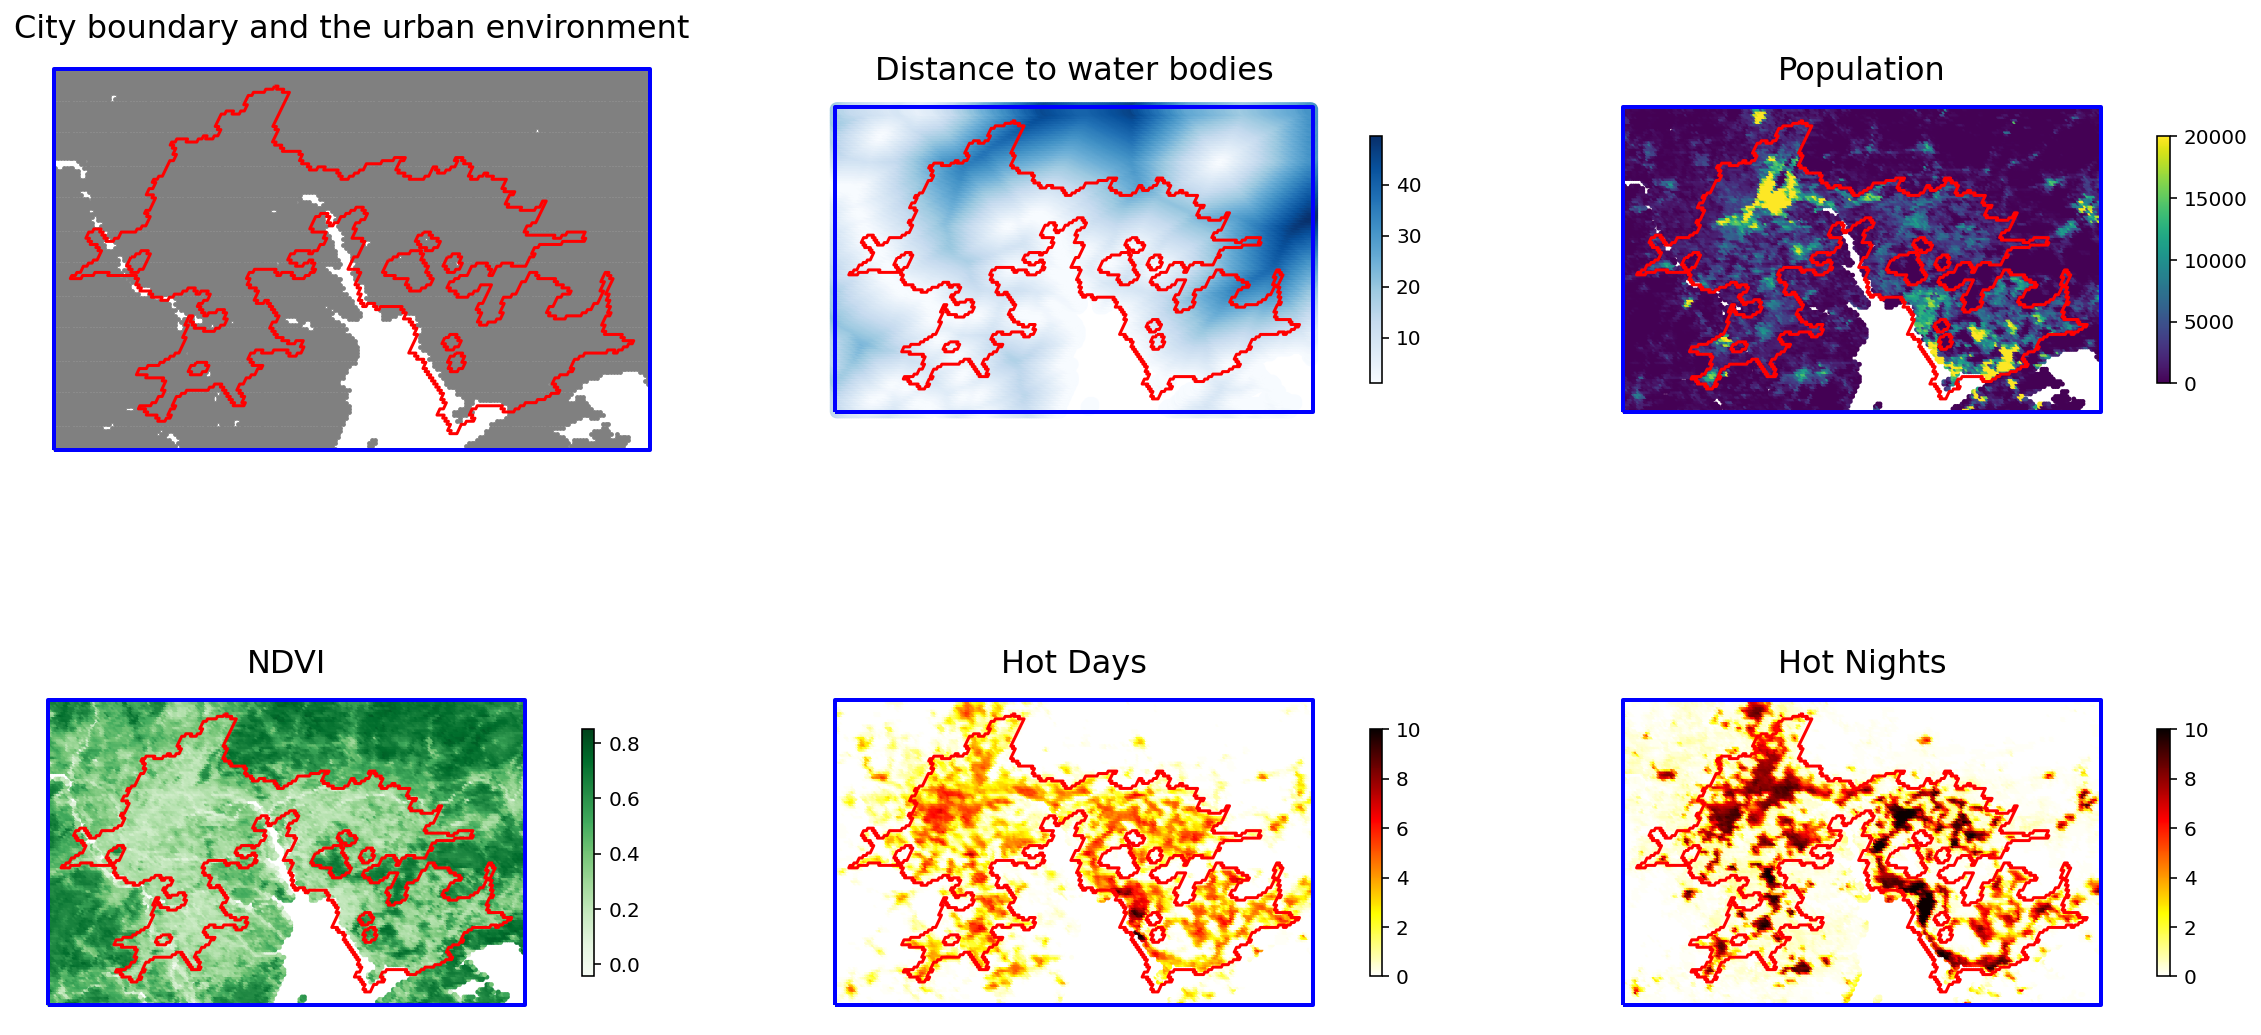

In [36]:
f,axs = plt.subplots(2, 3, figsize=(20,10))
ax = axs[0][0]
gdf_city.plot(ax=ax, color='gray', markersize=2)
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('City boundary and the urban environment', size=fs)
ax.axis('off');


ax = axs[0][1]
gdf_city.plot(ax=ax, column = 'dist', cmap='Blues', legend=True, legend_kwds={'shrink': 0.5})
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('Distance to water bodies', size=fs)
ax.axis('off');

ax = axs[0][2]
gdf_city.plot(ax=ax, column = 'pop', cmap='viridis', markersize=2,
              legend=True, legend_kwds={'shrink': 0.5}, vmax=20000)
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('Population', size=fs)
ax.axis('off');


ax = axs[1][0]
gdf_city.plot(ax=ax, column = 'NDVI', cmap='Greens', markersize=2,
              legend=True, legend_kwds={'shrink': 0.5}, vmax=0.85)
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('NDVI', size=fs)
ax.axis('off');


ax = axs[1][1]
gdf_city.plot(ax=ax, column = 'hot_days', cmap='hot_r', markersize=2,
              legend=True, legend_kwds={'shrink': 0.5}, vmax=10)
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('Hot Days', size=fs)
ax.axis('off');


ax = axs[1][2]
gdf_city.plot(ax=ax, column = 'hot_nights', cmap='hot_r', markersize=2,
              legend=True, legend_kwds={'shrink': 0.5}, vmax=10)
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('Hot Nights', size=fs)
ax.axis('off');



In [37]:
f.savefig('../figures_revision/S5.pdf', bbox_inches = 'tight')